Object Detection deals with both classification and localization of objects and background (non-objects)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
!mkdir plantdoc_IceVision

mkdir: cannot create directory ‘plantdoc_IceVision’: File exists


In [6]:
%cd plantdoc_IceVision

/content/gdrive/.shortcut-targets-by-id/1lj8Iu65HDzXMyq7roi1BdweCpGFp5rtF/plantdoc_IceVision


In [2]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh


--2021-09-26 20:50:13--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-09-26 20:50:13 (30.1 MB/s) - ‘install_colab.sh’ saved [1244/1244]



In [ ]:
!bash install_colab.sh

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |████████████████████████████████| 721 kB 5.2 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 394.7 MB 16 kB/s 
     |████████████████████████████████| 462 kB 53.7 MB/s 
     |████████████████████████████████| 3.8 MB 31.5 MB/s 
     |████████████████████████████████| 2.9 MB 31.0 MB/s 
- Installing torch and its dependencies
- Installing torch and its dependencies
     |████████████████████████████████| 7.1 MB 4.4 MB/s 
     |████████████████████████████████| 735.5 MB 8.4 kB/s 
     |████████████████████████████████| 763.5 MB 14 kB/s 

In [1]:
!pip install mmdet==2.13.0 -U -q


In [2]:
from icevision.all import *


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

#Gathering Data 


from Roboflow 

In [ ]:
# !curl -L "https://public.roboflow.com/ds/zXjUL8nJcn?key=gg0ObrYc9m" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip 

In [3]:
!git clone https://github.com/pratikkayal/PlantDoc-Object-Detection-Dataset.git 

Cloning into 'PlantDoc-Object-Detection-Dataset'...
remote: Enumerating objects: 5190, done.
^C


In [9]:
%cd PlantDoc-Object-Detection-Dataset/
!ls

/content/gdrive/.shortcut-targets-by-id/1lj8Iu65HDzXMyq7roi1BdweCpGFp5rtF/plantdoc_IceVision/PlantDoc-Object-Detection-Dataset
LICENSE.txt  TEST  test_labels.csv  TRAIN  train_labels.csv


#Data glimpse and routing

In [7]:
data_dir = Path('TRAIN') 


##Annotation

###using the annotation file provided by the github repo

In [10]:
import pandas as pd
train_labels = pd.read_csv('train_labels.csv', sep = ',', error_bad_lines=False)

In [11]:
train_labels.rename(columns={'class':'label'}, inplace=True)


In [12]:
train_labels.sample(3)

filename  ...  ymax
1369                                                                                                                                     IMG_1138.jpg  ...  2015
8072  tomato-blight-soil-treatment-early-tomato-blight-in-a-microcosm-lower-leaves-curl-up-and-die-bulls-eye-lesions-tomato-fungus-soil-treatment.jpg  ...   571
2058                                                                                           tomato-plant-is-infected-with-septoria-leaf-spot-1.jpg  ...   703

[3 rows x 8 columns]

In [13]:
train_labels.info()             # 8,329 observations, no null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  8469 non-null   object
 1   width     8469 non-null   int64 
 2   height    8469 non-null   int64 
 3   label     8469 non-null   object
 4   xmin      8469 non-null   int64 
 5   ymin      8469 non-null   int64 
 6   xmax      8469 non-null   int64 
 7   ymax      8469 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 529.4+ KB


In [14]:
train_labels.filename.nunique() # 2,315 unique filenames


2345

In [15]:
train_labels.label.unique()

array(['Cherry leaf', 'Peach leaf', 'Corn leaf blight', 'Apple rust leaf', 'Potato leaf late blight', 'Strawberry leaf', 'Corn rust leaf', 'Tomato leaf late blight', 'Tomato mold leaf', 'Potato leaf early blight', 'Apple leaf', 'Tomato leaf yellow virus', 'Blueberry leaf', 'Tomato leaf mosaic virus', 'Raspberry leaf',
       'Tomato leaf bacterial spot', 'Squash Powdery mildew leaf', 'grape leaf', 'Corn Gray leaf spot', 'Tomato Early blight leaf', 'Apple Scab Leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Soyabean leaf', 'Bell_pepper leaf spot', 'Bell_pepper leaf', 'grape leaf black rot', 'Potato leaf',
       'Tomato two spotted spider mites leaf'], dtype=object)

##Class mapping

In [16]:
_CLASSES = train_labels.label.unique().tolist()
class_map = ClassMap(_CLASSES)
class_map

<ClassMap: {'background': 0, 'Cherry leaf': 1, 'Peach leaf': 2, 'Corn leaf blight': 3, 'Apple rust leaf': 4, 'Potato leaf late blight': 5, 'Strawberry leaf': 6, 'Corn rust leaf': 7, 'Tomato leaf late blight': 8, 'Tomato mold leaf': 9, 'Potato leaf early blight': 10, 'Apple leaf': 11, 'Tomato leaf yellow virus': 12, 'Blueberry leaf': 13, 'Tomato leaf mosaic virus': 14, 'Raspberry leaf': 15, 'Tomato leaf bacterial spot': 16, 'Squash Powdery mildew leaf': 17, 'grape leaf': 18, 'Corn Gray leaf spot': 19, 'Tomato Early blight leaf': 20, 'Apple Scab Leaf': 21, 'Tomato Septoria leaf spot': 22, 'Tomato leaf': 23, 'Soyabean leaf': 24, 'Bell_pepper leaf spot': 25, 'Bell_pepper leaf': 26, 'grape leaf black rot': 27, 'Potato leaf': 28, 'Tomato two spotted spider mites leaf': 29}>

#Custom Parsing


In [17]:
template_record = ObjectDetectionRecord()


In [18]:
class PlantParser(Parser):
  def __init__(self, template_record, data_dir):
    super().__init__(template_record = template_record)
    self.data_dir = data_dir 
    self.df = train_labels 
    self.class_map = class_map 
  def __iter__(self) -> Any:
    for o in self.df.itertuples():
      yield o
  def __len__(self) -> int:
    return len(self.df)
  def record_id(self, o) -> Hashable:
    return o.filename
  def parse_fields(self, o, record, is_new):
    if is_new:
      record.set_filepath(self.data_dir / o.filename)
      record.set_img_size(ImgSize(width= o.width, height= o.height))
      record.detection.set_class_map(self.class_map)
    record.detection.add_bboxes(
                [BBox.from_xyxy(o.xmin, o.ymin, o.xmax, o.ymax)])
    record.detection.add_labels([o.label])

In [19]:
parser = PlantParser(template_record, data_dir)
train_records, valid_records = parser.parse()

  0%|          | 0/8469 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/2345 [00:00<?, ?it/s]

WARNING  - (record_id: NCLB.jpg) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/NCLB.jpg' does not exist | icevision.core.record:autofix_records:104
WARNING  - (record_id: early-blight-1.jpg) - 🚫 Record could not be autofixed and will be removed because: File 'TRAIN/early-blight-1.jpg' does not exist | icevision.core.record:autofix_records:104
AUTOFIX-SUCCESS - (record_id: 2f73110f80014a25a53f9551c94bf164.png.jpg) - Clipping bbox xmax from 525 to image width 0 (Before: <BBox (xmin:58, ymin:92, xmax:525, ymax:386)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 2f73110f80014a25a53f9551c94bf164.png.jpg) - Clipping bbox ymax from 386 to image height 0 (Before: <BBox (xmin:58, ymin:92, xmax:0, ymax:386)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-FAIL - (record_id: 2f73110f80014a25a53f9551c94bf164.png.jpg) - Cannot auto-fix coordinates: <BBox (xmin:58, ymin:92, xmax:0, ymax:0)>
	x_min:58 is greater than or equal to x_max

BaseRecord

common: 
	- Filepath: TRAIN/Tomato%20greenhouse%20leaf%20edema%20and%20distortion2F.JPG.jpg
	- Img: None
	- Record ID: Tomato%20greenhouse%20leaf%20edema%20and%20distortion2F.JPG.jpg
	- Image size ImgSize(width=1024, height=768)
detection: 
	- BBoxes: [<BBox (xmin:1, ymin:188, xmax:1017, ymax:724)>]
	- Class Map: <ClassMap: {'background': 0, 'Cherry leaf': 1, 'Peach leaf': 2, 'Corn leaf blight': 3, 'Apple rust leaf': 4, 'Potato leaf late blight': 5, 'Strawberry leaf': 6, 'Corn rust leaf': 7, 'Tomato leaf late blight': 8, 'Tomato mold leaf': 9, 'Potato leaf early blight': 10, 'Apple leaf': 11, 'Tomato leaf yellow virus': 12, 'Blueberry leaf': 13, 'Tomato leaf mosaic virus': 14, 'Raspberry leaf': 15, 'Tomato leaf bacterial spot': 16, 'Squash Powdery mildew leaf': 17, 'grape leaf': 18, 'Corn Gray leaf spot': 19, 'Tomato Early blight leaf': 20, 'Apple Scab Leaf': 21, 'Tomato Septoria leaf spot': 22, 'Tomato leaf': 23, 'Soyabean leaf': 24, 'Bell_pepper leaf spot': 25, 'Bell_pepp

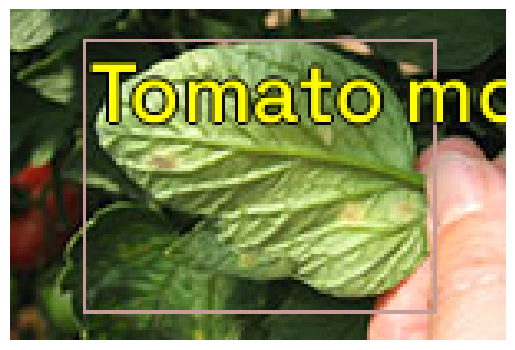

In [22]:
show_record(train_records[0], class_map= class_map, font_size= 25,
            label_color= '#ffff00')
train_records[2]

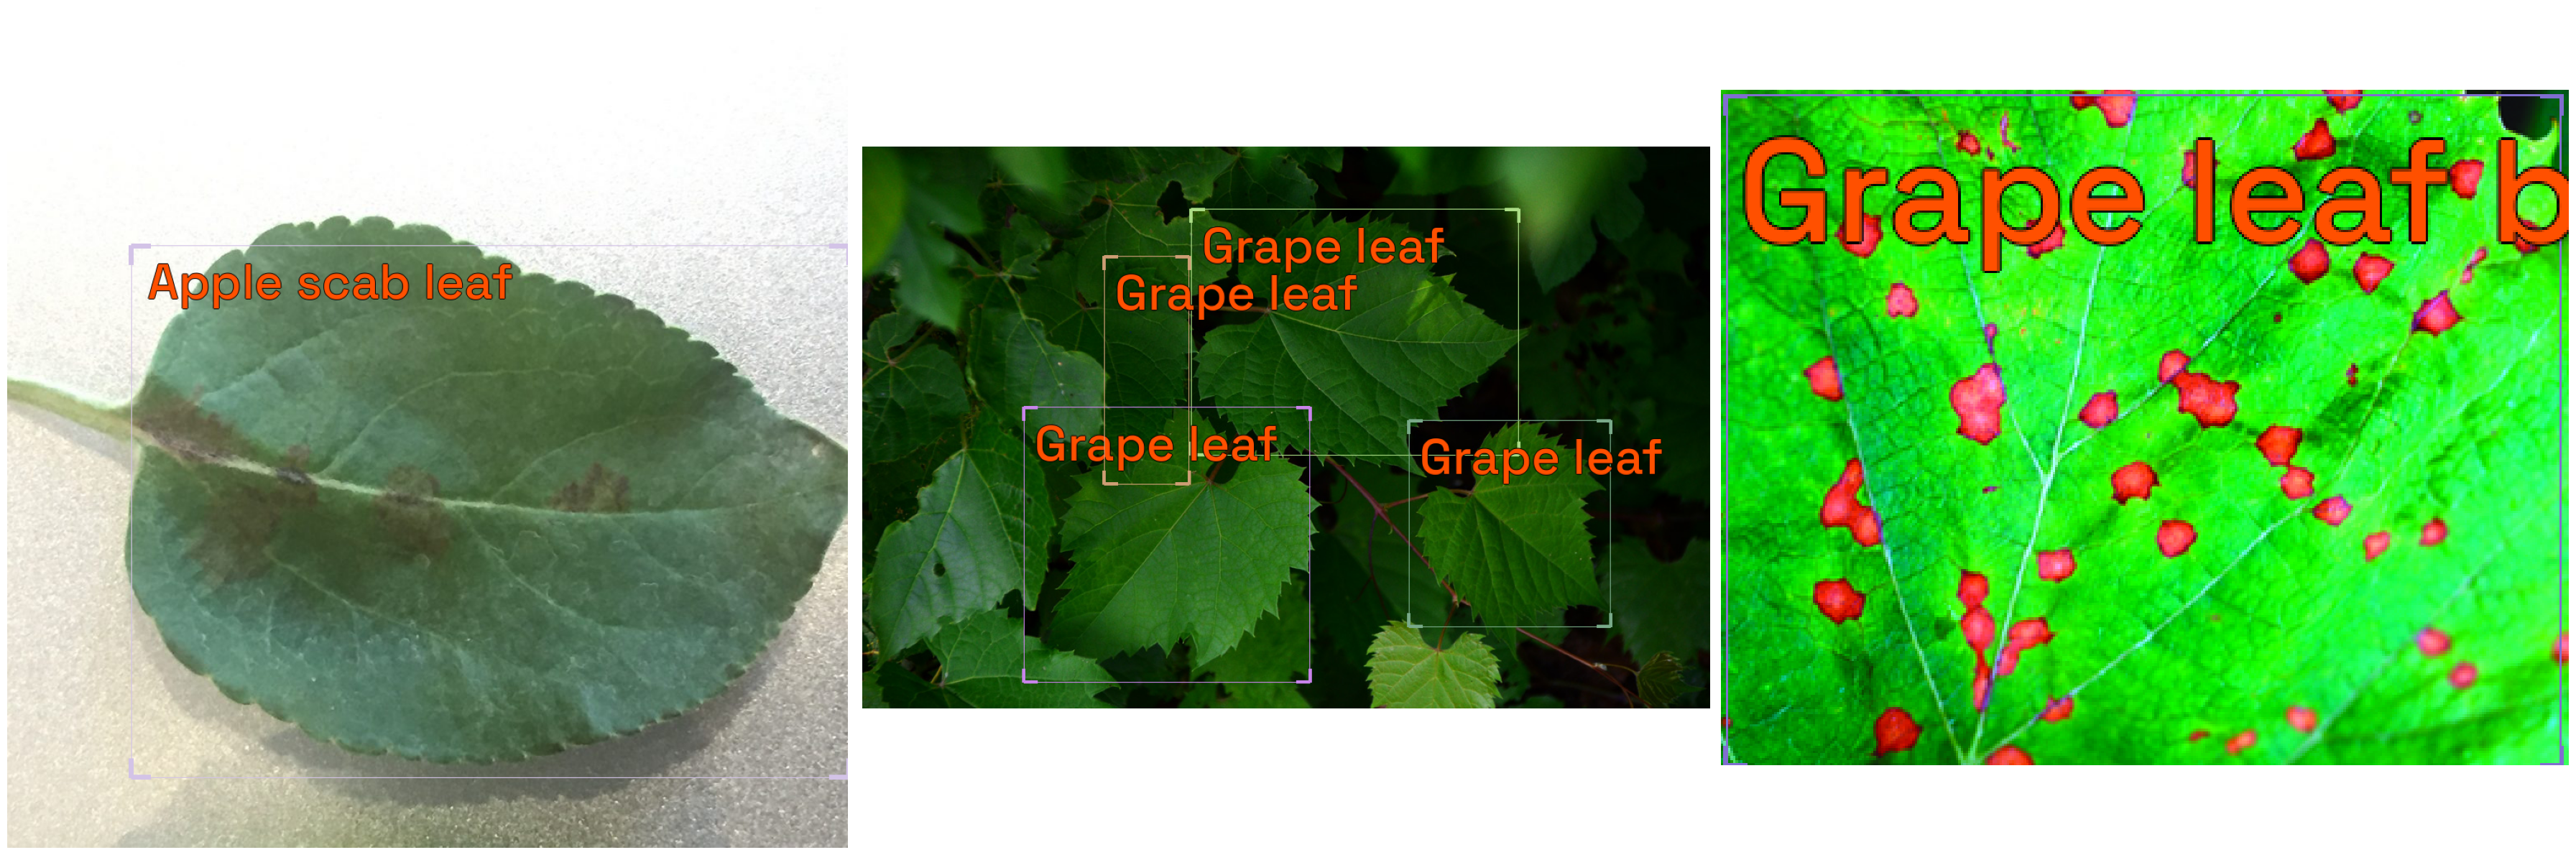

In [29]:
show_records(train_records[33:36], ncols=3,
             font_size=60, label_color = '#ff5000')

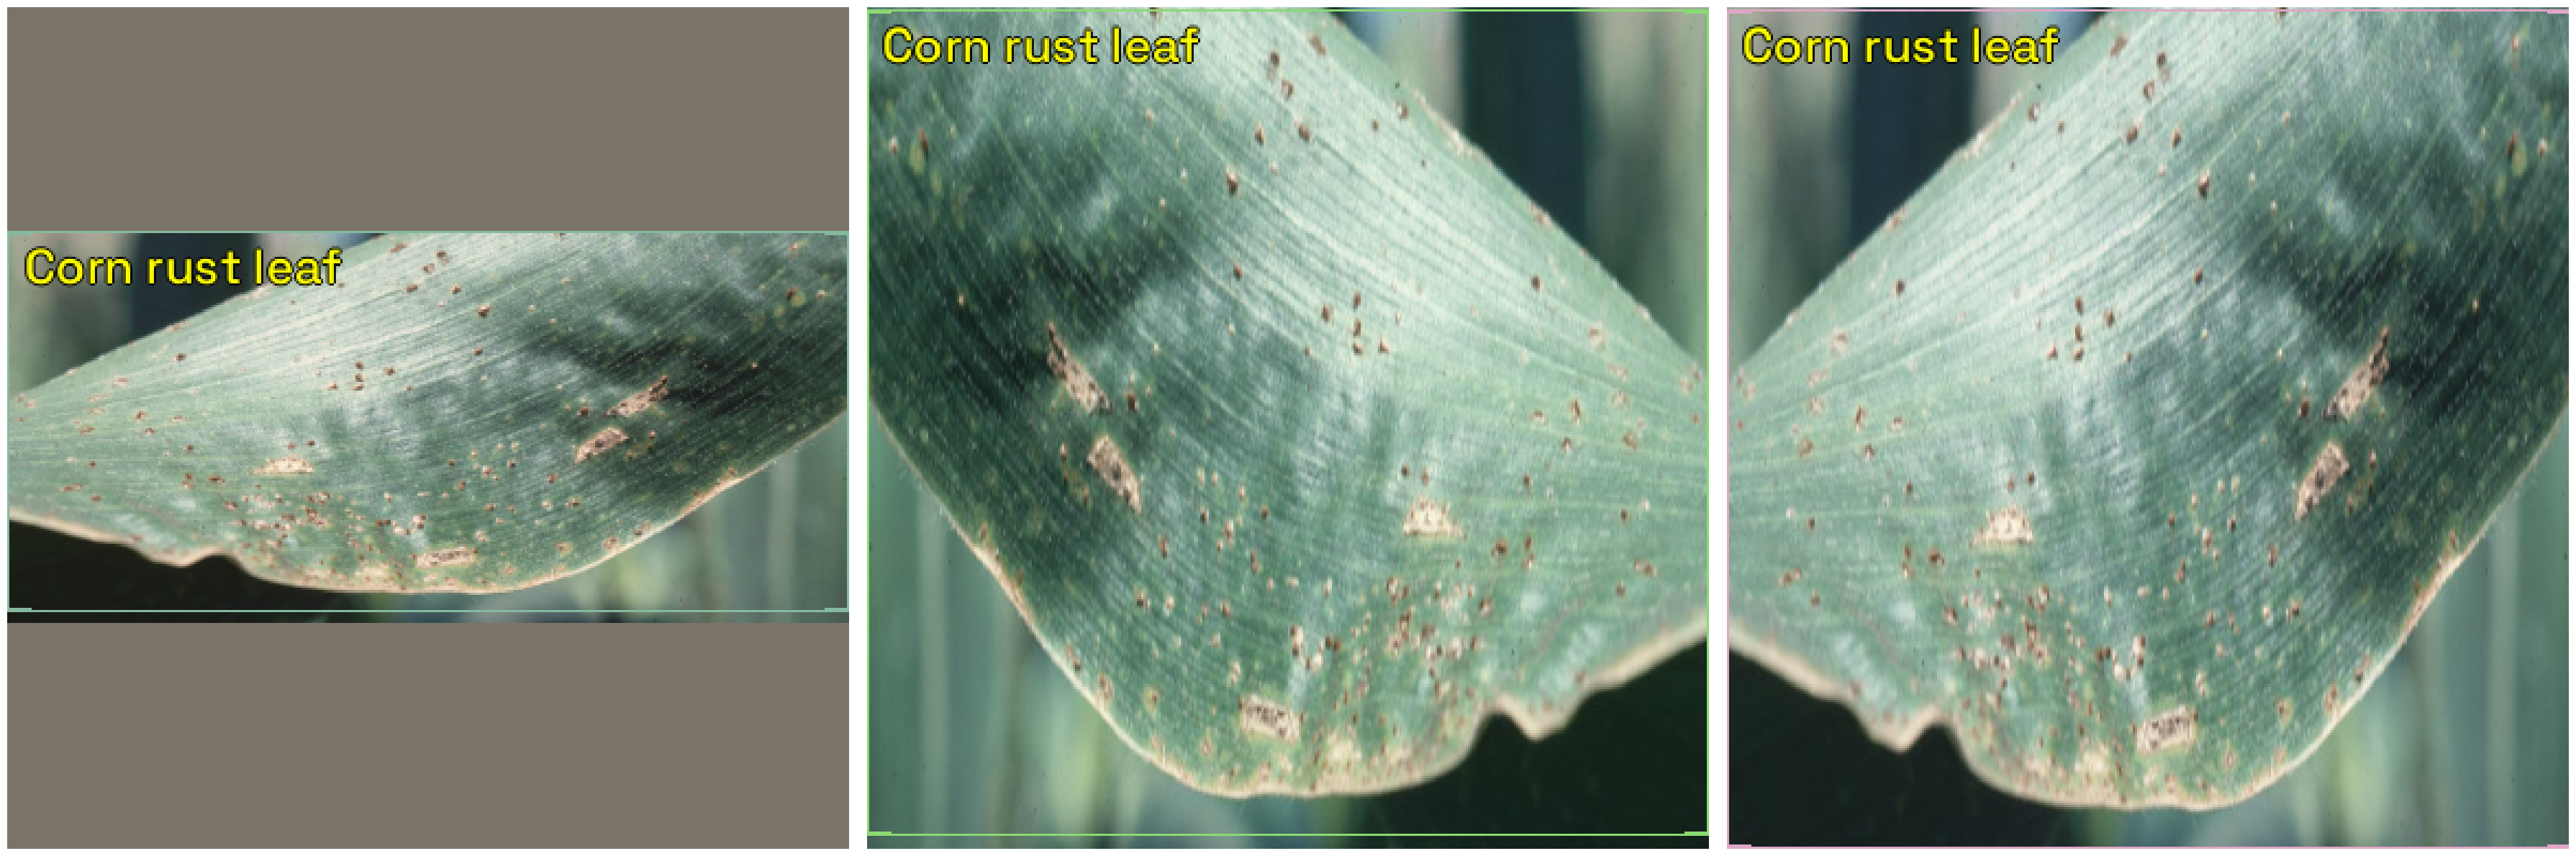

In [43]:
presize = 512
image_size = 384
train_tfms = tfms.A.Adapter(
     [*tfms.A.aug_tfms(size= image_size, presize= presize),   tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter(
     [*tfms.A.resize_and_pad(size=image_size), tfms.A.Normalize()])
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)
samples = [train_ds[38] for _ in range(3)]
show_samples(samples, ncols=3, font_size=22, label_color= '#ffff00')

In [26]:
import matplotlib.pyplot as plt
def plot_metrics(learn, title, x, y):
  plt.plot(L(learn.recorder.values).itemgot())
  plt.xlabel('epoch')
  plt.ylabel('mAP (green), Loss (blue, orange)')
  plt.title(title)
  plt.text(x, y, 
        'Legend: mAP(green), train_loss(blue), valid_loss(orange')

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]
model_type_frcnn = models.torchvision.faster_rcnn 
backbone = model_type_frcnn.backbones.resnet50_fpn()
model_frcnn = model_type_frcnn.model(backbone=backbone, 
                      num_classes=len(parser.class_map))
train_dl_frcnn = model_type_frcnn.train_dl(train_ds, 
                      batch_size=16, num_workers=4, shuffle=True)
valid_dl_frcnn = model_type_frcnn.valid_dl(valid_ds, 
                      batch_size=16, num_workers=4, shuffle=False)
class LightModel(model_type_frcnn.lightning.ModelAdapter):
    def configure_optimizers(self):
        return SGD(self.parameters(), lr=1e-4)

light_model = LightModel(model_frcnn, metrics=metrics)
trainer = pl.Trainer(max_epochs=20)
trainer.fit(light_model, train_dl_frcnn, valid_dl_frcnn)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs

  | Name  | Type       | Params
-------------------------------------
0 | model | FasterRCNN | 41.4 M
-------------------------------------
41.2 M    Trainable params
222 K     Non-trainable params
41.4 M    Total params
165.771   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

ValueError: ignored

In [ ]:
model_type_frcnn.show_results(model_frcnn, valid_ds, detection_threshold=.5)
